# Imputación con interpolación

En esta lección veremos qué es la interpolación y cómo usar este método para realizar el manejo de datos faltantes en una Serie de Tiempo haciendo uso del método "interp" en la librería Pandas.

Al final veremos las ventajas y limitaciones de este método y las situaciones en las que resulta adecuado usarlo.

## 1. Función auxiliar

Comencemos re-creando la función `graficar_serie` usada en una lección anterior:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def graficar_serie(df, obs='', titulo=''):
    '''
    Permite graficar la Serie de Tiempo y mostrar simultáneamente
    sus valores extremos.
    
    Parámetros:
    - df: DataFrame de Pandas con la(s) Serie(s) de Tiempo
    - obs: nombre de la columna a graficar
    '''
    # Gráfico vacío
    fig, ax = plt.subplots(1,1)
    
    # Gráfico inicial
    if type(df) == pd.DataFrame:
        ax = sns.pointplot(data=df, x=df.index, y=obs, markers='')
    else:
        # Convertir Serie de Pandas a DataFrame de Pandas y graficar
        df = df.to_frame(name=obs) 
        ax = sns.pointplot(data=df, x=df.index, y=obs, markers='')
    
    # Dibujar sólo N=10 marcas temporales (en caso de tener series de tiempo)
    # con demasiadas marcas
    n_ticks = 10
    locator = mdates.AutoDateLocator(maxticks=n_ticks)
      

    # Apply the locator and formatter to the x-axis
    ax.xaxis.set_major_locator(locator)
   
        
    # Rotar los ticks 45°
    plt.xticks(rotation=45)
    
    # Etiquetas ejes horizontal y vertical
    plt.xlabel('Tiempo')
    plt.ylabel(obs)
    plt.title(titulo);

## 2. Los sets de datos

En este caso usaremos los sets:

- *co2_faltantes.csv*: registro histórico de niveles de CO2 en la atmósfera
- *clicks_obs_faltantes.csv*: información de interacción de usuarios (número de clicks) de un sitio web de artículos de vestuario.

Comencemos leyendo y mostrando cada set de datos:

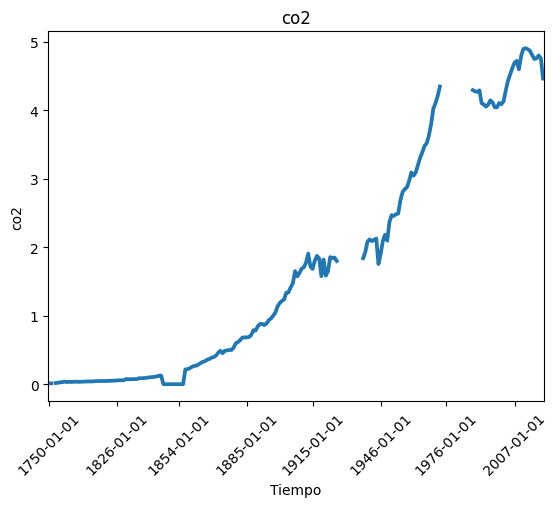

In [3]:
import pandas as pd

# Leer dataset co2_faltantes.csv
RUTA = '../datasets/missing_values/'

co2_df = pd.read_csv(RUTA + 'co2_faltantes.csv',
                    parse_dates = ['año'],
                    index_col = ['año'])
graficar_serie(co2_df, 'co2', 'co2')

Y ahora veamos la segunda Serie de Tiempo:

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_31936\513587334.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clicks_df = pd.read_csv(RUTA + 'clicks_obs_faltantes.csv',


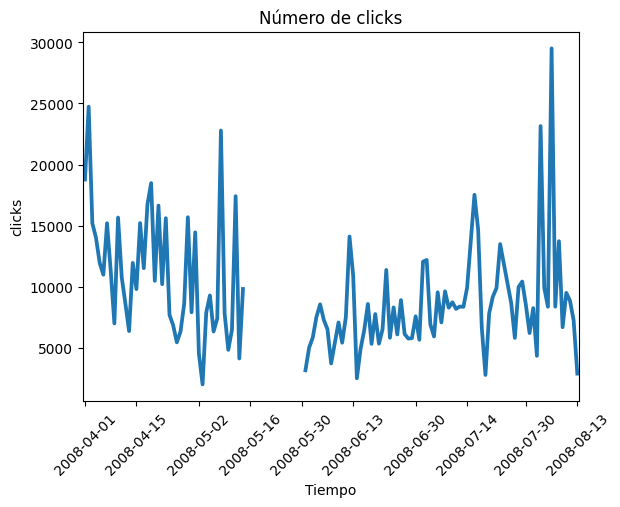

In [4]:
# Leer dataset clicks_obs_faltantes.csv
clicks_df = pd.read_csv(RUTA + 'clicks_obs_faltantes.csv',
                       parse_dates = ['fecha'],
                       index_col = ['fecha'])
graficar_serie(clicks_df, 'clicks', 'Número de clicks')

Muy bien, habiendo leído los sets de datos entendamos ahora el concepto básico de la interpolación.

## 3. La interpolación

De manera simple podemos definir la interpolación como:

> Un método que nos permite **estimar los valores de las observaciones faltantes** que se encuentran entre dos (o más) datos conocidos

Veamos esto gráficamente:

![](ejemplos_interpolacion.png)

Los métodos más usados para realizar la interpolación son:

- **Vecinos más cercanos** (*nearest neighbors*): se imputa la observación faltante con el dato conocido más cercano
- **Interpolación lineal**: se obtiene la ecuación de la línea recta entre dos pares de puntos y las observaciones en puntos intermedios se estiman a partir de esta ecuación. Requiere al menos dos puntos conocidos.
- **Interpolación polinómica**: es similar a la interpolación lineal pero se usan polinomios de grado 2 en adelante. Para interpolar un polinomio de grado "n" requerimos al menos "n+1" puntos conocidos.
- **Interpolación con *splines***: similar a la polinómica pero por segmentos.

Teniendo claro el concepto básico de la interpolación, veamos ahora sí cómo realizar el manejo de datos faltantes en los sets de datos que leímos hace un momento y haciendo uso de la librería Pandas.

## 4. Imputación con interpolación usando `interpolate()` de Pandas

Este método es muy sencillo. Simplemente:

1. Seleccionamos la columna que contiene datos faltantes dentro del *DataFrame*
2. Usamos el método `interpolate()` y especificando el método a usar a través del parámetro `method`

Los métodos disponibles son:

- `linear`
- `quadratic`
- `cubic`
- `nearest`
- `spline`. En este último caso debemos especificar el orden de los polinomios a interpolar usando el parámetro `order`

Veamos cómo con muy pocas líneas de código podemos implementar estas interpolaciones sobre la Serie de Tiempo que se encuentra en *co2_df*:

In [4]:
# Comencemos definiendo un listado de métodos de interpolación a aplicar
metodos = [
    'linear',
    'quadratic',
    'cubic',
    'nearest',
    'spline'
]

# Y ahora iteremos por cada método, realicemos la interpolación y almacenemos el resultado
# en una nueva columna del DataFrame original. En caso de que el método sea "spline" especificaremos
# un orden igual a 3
for metodo in metodos:
    if metodo != 'spline':
        co2_df[metodo] = co2_df['co2'].interpolate(method=metodo)
    else:
        co2_df[metodo] = co2_df['co2'].interpolate(method=metodo, order=3)

# E imprimamos en pantalla el DataFrame actualizado
co2_df

,co2,linear,quadratic,cubic,nearest,spline
año,,,,,,
1750-01-01,0.0125,0.01250,0.012500,0.012500,0.0125,0.012500
1760-01-01,0.0128,0.01280,0.012800,0.012800,0.0128,0.012800
1770-01-01,NaN,0.01485,0.014698,0.015851,0.0169,0.208248
1780-01-01,0.0169,0.01690,0.016900,0.016900,0.0169,0.016900
1790-01-01,0.0206,0.02060,0.020600,0.020600,0.0206,0.020600
...,...,...,...,...,...,...
2016-01-01,4.7496,4.74960,4.749600,4.749600,4.7496,4.749600
2017-01-01,4.7595,4.75950,4.759500,4.759500,4.7595,4.759500
2018-01-01,4.8022,4.80220,4.802200,4.802200,4.8022,4.802200


Y finalmente generemos los gráficos de la Serie de Tiempo original y de los resultados de las diferentes interpolaciones:

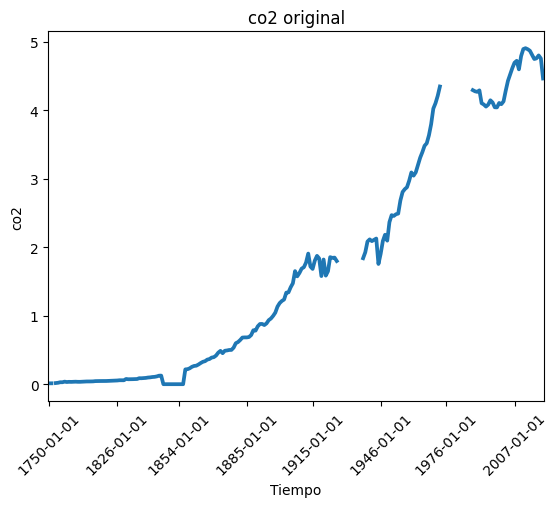

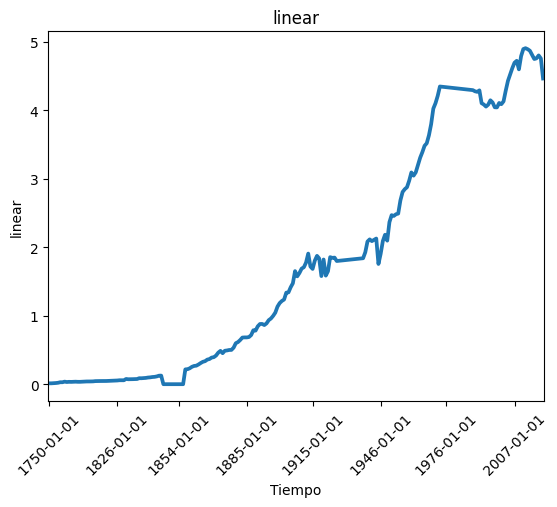

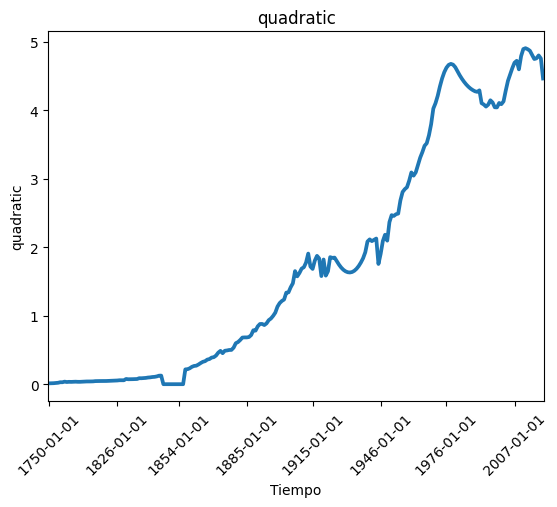

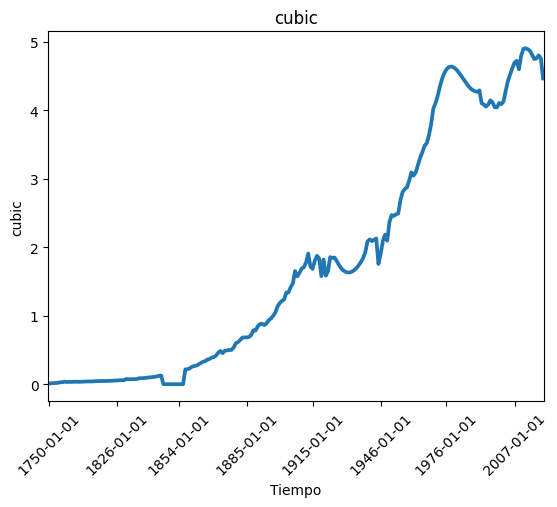

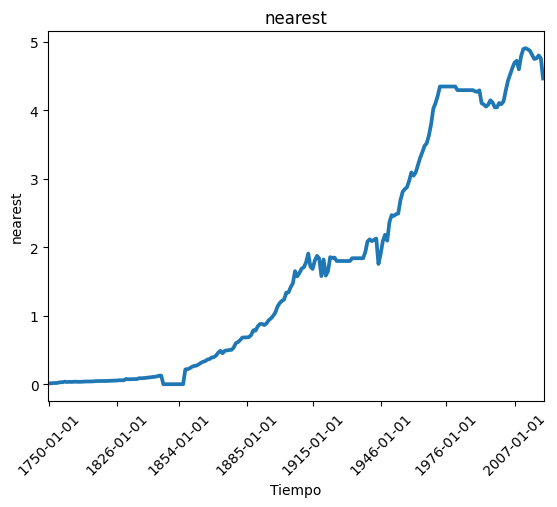

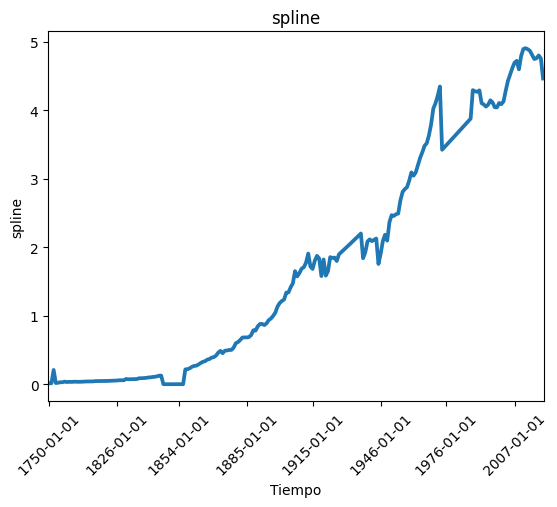

In [5]:
graficar_serie(co2_df, 'co2', 'co2 original')
for metodo in metodos:
    graficar_serie(co2_df, metodo, metodo)

Vemos que en este caso particular la interpolación "nearest" tiende a preservar mejor las características de la Serie de Tiempo, mientras que los métodos polinomiales (lineal, cuadrático, cúbico y *splines*) tienen a generar artefactos que no coinciden con el comportamiento de la Serie de Tiempo.

Veamos lo que ocurre con la serie *clicks_df*:

In [6]:
# Iteremos por cada método, realicemos la interpolación y almacenemos el resultado
# en una nueva columna del DataFrame original. En caso de que el método sea "spline" especificaremos
# un orden igual a 3
for metodo in metodos:
    if metodo != 'spline':
        clicks_df[metodo] = clicks_df['clicks'].interpolate(method=metodo)
    else:
        clicks_df[metodo] = clicks_df['clicks'].interpolate(method=metodo, order=3)

# E imprimamos en pantalla el DataFrame actualizado
clicks_df

,precio,ubicación,clicks,linear,quadratic,cubic,nearest,spline
fecha,,,,,,,,
2008-04-01,43.155647,2,18784.0,18784.0,18784.0,18784.0,18784.0,18784.0
2008-04-02,43.079056,1,24738.0,24738.0,24738.0,24738.0,24738.0,24738.0
2008-04-03,43.842609,2,15209.0,15209.0,15209.0,15209.0,15209.0,15209.0
2008-04-04,43.312376,1,14018.0,14018.0,14018.0,14018.0,14018.0,14018.0
2008-04-05,43.941176,1,11974.0,11974.0,11974.0,11974.0,11974.0,11974.0
...,...,...,...,...,...,...,...,...
2008-08-09,44.182033,1,6716.0,6716.0,6716.0,6716.0,6716.0,6716.0
2008-08-10,43.608260,1,9523.0,9523.0,9523.0,9523.0,9523.0,9523.0
2008-08-11,43.553363,1,8881.0,8881.0,8881.0,8881.0,8881.0,8881.0


Y generemos las gráficas correspondientes:

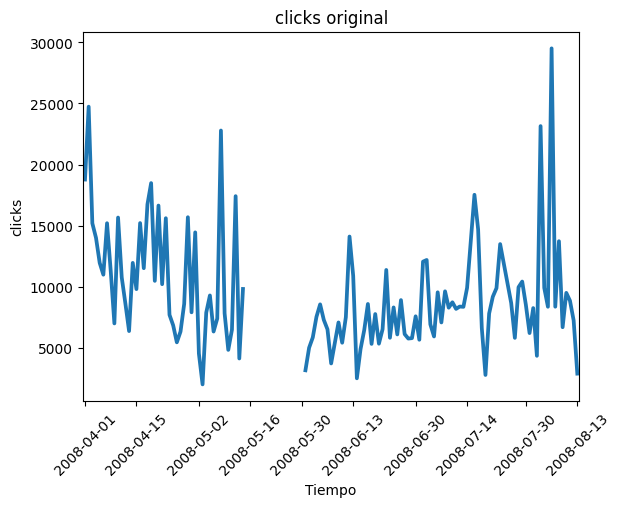

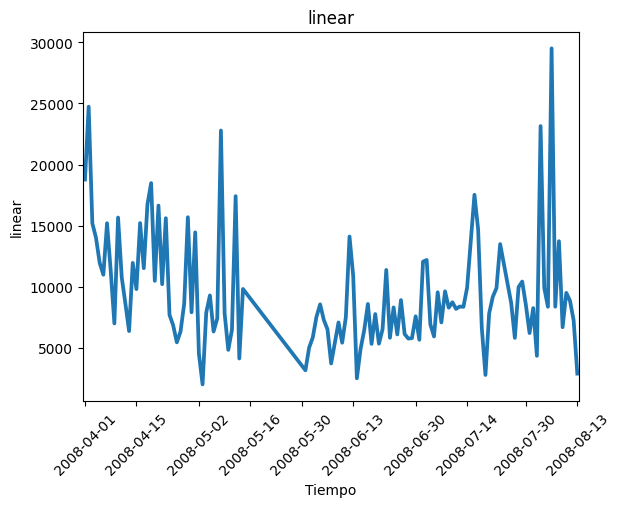

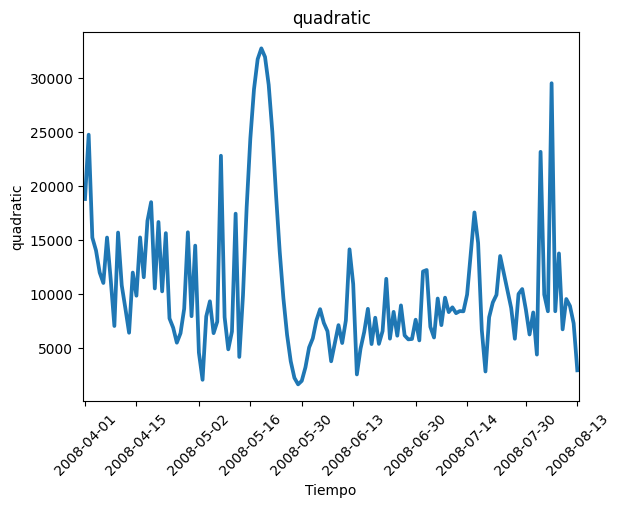

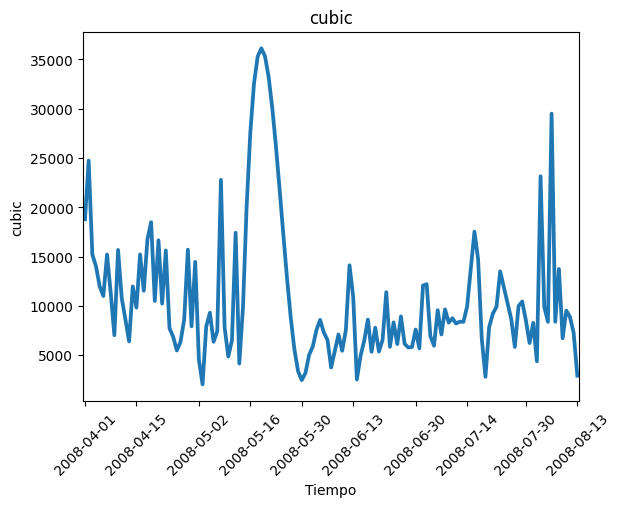

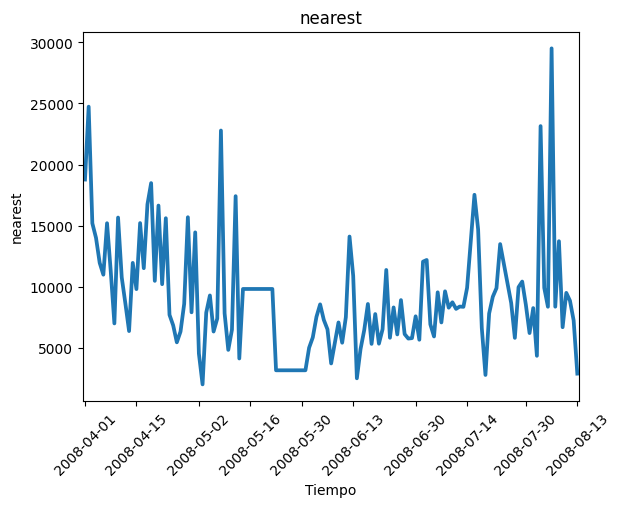

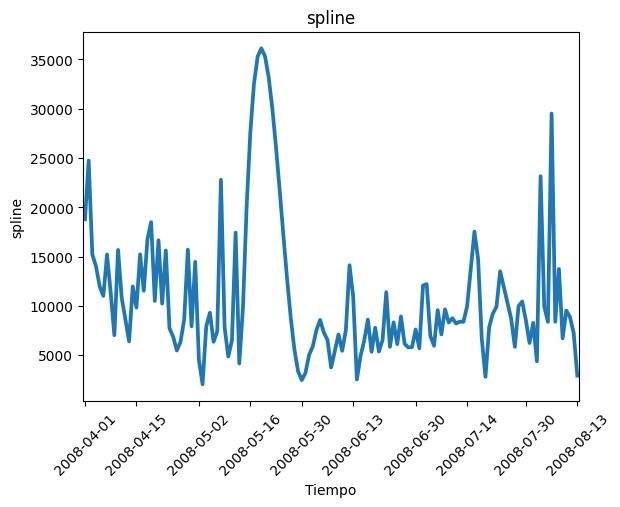

In [7]:
graficar_serie(clicks_df, 'clicks', 'clicks original')
for metodo in metodos:
    graficar_serie(clicks_df, metodo, metodo)

En este caso ninguna de las interpolaciones resulta adecuada:

1. Las interpolaciones polinomiales generan artefactos en todos los casos
2. Mientras que la interpolación "nearest" es muy sensible a valores extremos

## 5. Aspectos a tener en cuenta

Con base en las observaciones anteriores podemos concluir lo siguiente acerca del manejo de datos faltantes con técnicas de interpolación:

1. En general la interpolación polinomial o *splines*, con polinomios de grado 2 o mayores, tiende a generar artefactos que no coinciden con el comportamiento de la Serie de Tiempo.
2. Cuando tenemos bloques con pocos datos faltantes consecutivos, la interpolación lineal o por vecinos más cercanos tiende a funcionar mejor.
3. Sin embargo, hay que tener en cuenta que la interpolación por vecinos más cercanos es sensible a valores extremos.
4. Cuando tenemos bloques con muchos datos faltantes consecutivos, en general ninguno de los métodos de interpolación resulta adecuado.

En resumen podríamos decir que:
- Para bloques con pocos datos faltantes consecutivos, y sin valores extremos, se sugiere usar métodos de interpolación lineal o vecinos más cercanos, o los métodos de llenado hacia adelante o hacia atrás.
- Para bloques con muchos datos faltantes consecutivos se sugieren métodos más robustos como el uso de modelos de regresión (*Machine Learning*) o el método MICE.